In [10]:
import gensim
import pandas as pd
import networkx as nx

In [11]:
model = gensim.models.KeyedVectors.load('model_vk_1945-1950.w2v')

In [12]:
model.wv.most_similar('politiek')

[('regeringspolitiek', 0.7351635098457336),
 ('beleid', 0.7271846532821655),
 ('handelspolitiek', 0.7185651063919067),
 ('politieke', 0.6995853185653687),
 ('tendenzen', 0.6896506547927856),
 ('neutraliteit', 0.6890282034873962),
 ('democratie', 0.6868898272514343),
 ('inmenging', 0.6794837713241577),
 ('opvattingen', 0.6792891621589661),
 ('denkbeelden', 0.6707538962364197)]

In [27]:
keyword = "democratie"
r = []

for word,similarity in model.wv.most_similar(keyword,topn=5):
    
    r.append([keyword,word,similarity])
    
    for word2,similarity2 in model.wv.most_similar(word,topn=5):
        
        r.append([word,word2,similarity2])
        

In [28]:
df = pd.DataFrame(r,columns=['word','similar','cosine_similarity'])

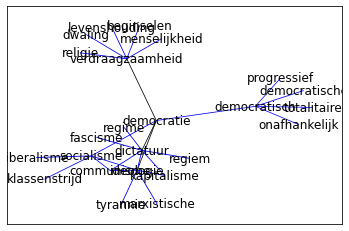

In [29]:
G = nx.Graph()

for i,r in df.iterrows():
    G.add_edge(r['word'],r['similar'],color='black' if r['word'] == keyword else 'blue',weight=r['cosine_similarity'])

pos = nx.spring_layout(G)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw_networkx_edges(G,pos,edge_color=colors,width=weights)
labels = nx.draw_networkx_labels(G,pos)